In [3]:
#%run utility_GetInputHits.py
#%qtconsole --style monokai

In [9]:
from HGCalImageAlgo3D import *
from timeit import default_timer as timer

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

In [5]:
DatasetFile = 'CMSSW9304_partGun_PDGid22_x100_E30.0To30.0_NTUP'
DatasetDir  = "/Users/zihengchen/Documents/HGCal/clustering/data/"
df          = pd.read_pickle(DatasetDir+"input/"+DatasetFile+"_rechit.pkl")

# 1. Run clustering

In [7]:
SetImagingAlgo()
dfresultclus = RunImagingAlgo(df,N=100)
dfresultclus.to_pickle("../data/output/"+DatasetFile+"_OutputClus.pkl")

100%|██████████| 100/100 [00:02<00:00, 35.85it/s]


# 2.Make Some Plots

In [8]:
from utility_benchmark import *
dfc = read_root(DatasetDir+DatasetFile+".root",'ana/hgc')
energy3d,count3d = [],[]
for i in np.arange(len(dfc)):
    slt = dfc.multiclus_z[i]>0
    energyi = dfc.multiclus_energy[i][slt]
    energy3d.append(np.sum(energyi))
    count3d.append(energyi.size)
energy3d = np.array(energy3d)
count3d = np.array(count3d)

ImageAlgo3D:0.05594488306281467,29.36175158844494
cmssw:0.05285209019978841,27.697036743164062


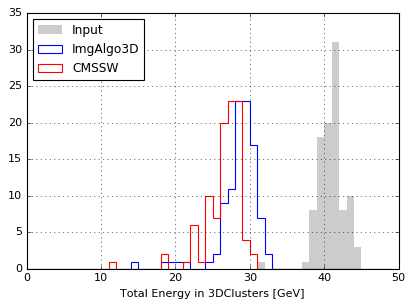

In [14]:
f = plt.hist(dfresultclus["clust_inputenergy"],color="k",bins=np.arange(0,50,1),alpha=0.2,histtype="stepfilled",lw=0,label="Input")
f = plt.hist(dfresultclus["clust_includedenergy"],color="b",bins=np.arange(0,50,1),alpha=1,histtype="step",lw=1,label="ImgAlgo3D")
f = plt.hist(energy3d,color="r",bins=np.arange(0,50,1),alpha=1,histtype="step",lw=1,label="CMSSW")

plt.grid(True)
plt.legend(loc="upper left",fontsize=11)
plt.xlabel("Total Energy in 3DClusters [GeV]")


eff,ave = effsigma(dfresultclus["clust_includedenergy"])
eff = eff/30

print("ImageAlgo3D:{},{}".format(eff,ave))

eff,ave = effsigma(energy3d)
eff = eff/30
print("cmssw:{},{}".format(eff,ave))

plt.savefig("../plot/result_energy.png")

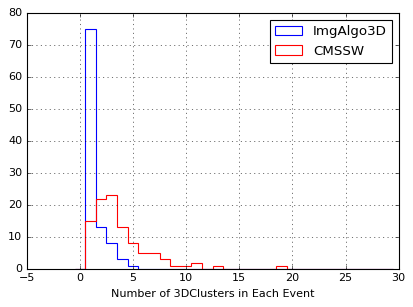

In [15]:
f = plt.hist(dfresultclus["clust_n"],bins=np.arange(-.5,30,1),color="b",alpha=1,
             histtype="step", lw=1,label="ImgAlgo3D")
f = plt.hist(count3d,bins=np.arange(-.5,30,1),color="r",alpha=1,
             histtype="step", lw=1,label="CMSSW")
plt.grid(True)
plt.legend()
plt.xlabel("Number of 3DClusters in Each Event")
plt.savefig("../plot/result_nclus.png")